In [1]:
!pip install scikit-learn numpy pandas matplotlib


[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
data = pd.read_csv('air_quality_data.csv')
print("Dataset shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset shape: (8760, 5)

First few rows:


,Date,Temperature,Humidity,PM2.5,PM10
0,2022-01-01 0:00:00,6.854305,1.961053,56.120565,140.328193
1,2022-01-01 1:00:00,32.782144,67.136801,59.609853,58.820015
2,2022-01-01 2:00:00,22.939727,52.315815,40.997973,71.128404
3,2022-01-01 3:00:00,16.939632,89.863893,83.848269,63.236436
4,2022-01-01 4:00:00,-2.979161,16.439268,18.517594,42.082053


In [4]:
# Explore the dataset
print("Dataset shape:", data.shape)
print("\nColumn names:", data.columns.tolist())
print("\nData types:")
print(data.dtypes)
print("\nMissing values:")
print(data.isnull().sum())
print("\nBasic statistics:")
data.describe()

Dataset shape: (8760, 5)

Column names: ['Date', 'Temperature', 'Humidity', 'PM2.5', 'PM10']

Data types:
Date            object
Temperature    float64
Humidity       float64
PM2.5          float64
PM10           float64
dtype: object

Missing values:
Date           0
Temperature    0
Humidity       0
PM2.5          0
PM10           0
dtype: int64

Basic statistics:


,Temperature,Humidity,PM2.5,PM10
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,12.227369,50.154908,50.734174,74.402790
std,12.978285,28.871321,28.762157,43.056552
min,-9.999476,0.005283,0.004812,0.000831
25%,0.950413,25.221259,26.065142,36.912032
50%,12.135590,50.258574,50.878727,74.531445
75%,23.374345,75.441279,75.211026,110.907742
max,34.987295,99.992483,99.990098,149.968406


In [5]:
# Extract features
x = data["Temperature"]
y = data["PM2.5"]

# Convert x to 2D array for normalization
x = x.values.reshape(-1, 1)

# Initialize and apply MinMaxScaler
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

print("Original Temperature shape:", x.shape)
print("Normalized Temperature shape:", x_normalized.shape)
print("\nFirst 5 original values:")
print(x[:5].flatten())
print("\nFirst 5 normalized values:")
print(x_normalized[:5].flatten())

Original Temperature shape: (8760, 1)
Normalized Temperature shape: (8760, 1)

First 5 original values:
[ 6.85430535 32.78214379 22.93972738 16.93963179 -2.97916118]

First 5 normalized values:
[0.37463861 0.95098222 0.73219754 0.59882288 0.15605288]


In [6]:
# Define segmentation function
def sample_space(data):
    """Segment data into windows of size 10"""
    points = len(data)
    sample_window = 10
    num_samples = int(points / sample_window)
    tot = []
    starting = 0
    ending = sample_window
    
    for j in range(num_samples):
        saps = data[int(starting):int(ending)]
        starting = ending
        ending = starting + sample_window
        tot.append(saps)
    
    return tot

# Apply segmentation to normalized temperature
sample1 = sample_space(x_normalized)
print(f"Number of segments: {len(sample1)}")
print(f"Shape of segments: {np.shape(sample1)}")

Number of segments: 876
Shape of segments: (876, 10, 1)


In [7]:
# Define feature extraction functions
def mean_abs_val(data):
    """Calculate Mean Absolute Value"""
    mav = 0
    for i in data:
        mav += abs(i)
    mav = mav / len(data)
    return mav

def rms_val(data):
    """Calculate Root Mean Square Value"""
    temp = 0
    for i in data:
        temp += abs(i**2)
    temp = temp / len(data)
    rms = temp**0.5
    return rms

print("Feature extraction functions defined.")

Feature extraction functions defined.



In [8]:
# Extract features from segments
mean_Sample = []
rms_Sample = []

for j in range(len(sample1) - 1):
    mean = mean_abs_val(sample1[j])
    mean_Sample.append(mean)
    rms = rms_val(sample1[j])
    rms_Sample.append(rms)

# Create DataFrame with features
df1 = pd.DataFrame([mean_Sample, rms_Sample])
print("Features DataFrame shape:", df1.shape)
df1.head()

Features DataFrame shape: (2, 875)


,0,1,2,3,4,5,6,7,8,9,...,865,866,867,868,869,870,871,872,873,874
0,[0.5202780428756569],[0.3953724303341507],[0.4004933343234815],[0.5094088008489234],[0.4046643375775303],[0.5755426467038636],[0.4674964447708997],[0.45486790833058943],[0.5245040381063364],[0.450445624616446],...,[0.4019667270763329],[0.4441072118031563],[0.37126612928672137],[0.3336683808653453],[0.5085169978287949],[0.5123602072987832],[0.6518334594619065],[0.45255058828947214],[0.4146353105233628],[0.30039409401510386]
1,[0.6004465334850827],[0.4885211872172543],[0.4578702503566985],[0.6045680018252181],[0.479165513895474],[0.6773717455156578],[0.5528827871687053],[0.5546100157395332],[0.583116652975974],[0.52200536473927],...,[0.4551860826455427],[0.4980201956332526],[0.46368927580425995],[0.4124617960762802],[0.561216498251522],[0.5803530876693043],[0.6814880164420196],[0.5057470853761621],[0.49844709379860325],[0.36123363101788225]


In [9]:
# Transpose and prepare features
df2 = df1.T
df2.columns = ["Mean", "RMS"]
x_features = df2

print("Feature matrix shape:", x_features.shape)
print("\nFeature matrix:")
x_features.head()

Feature matrix shape: (875, 2)

Feature matrix:


,Mean,RMS
0,[0.5202780428756569],[0.6004465334850827]
1,[0.3953724303341507],[0.4885211872172543]
2,[0.4004933343234815],[0.4578702503566985]
3,[0.5094088008489234],[0.6045680018252181]
4,[0.4046643375775303],[0.479165513895474]


In [10]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_features)

# Convert to DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print("PCA DataFrame shape:", pca_df.shape)
print("\nExplained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))
print("\nPrincipal Components:")
pca_df.head()

PCA DataFrame shape: (875, 2)

Explained variance ratio: [0.98341453 0.01658547]
Total variance explained: 1.0

Principal Components:


,PC1,PC2
0,0.042075,0.007206
1,-0.125629,0.009183
2,-0.142579,-0.016864
3,0.036853,0.017591
4,-0.125108,-0.003993


In [11]:
# Prepare target variable (y)
# Apply segmentation to PM2.5 values
sample_y = sample_space(y)

mean_Sample_y = []
for j in range(len(sample_y) - 1):
    mean = mean_abs_val(sample_y[j])
    mean_Sample_y.append(mean)

# Create target DataFrame
df_y = pd.DataFrame([mean_Sample_y])
df_y = df_y.T
df_y.columns = ["PM2.5"]

print("Target variable shape:", df_y.shape)
print("\nTarget variable:")
df_y.head()

Target variable shape: (875, 1)

Target variable:
 (875, 1)

Target variable:


,PM2.5
0,61.646528
1,65.360291
2,67.127892
3,49.798982
4,63.566917


In [12]:
# Split data into training and testing sets (70-30 split)
X = pca_df
y = df_y

split_idx = int(0.7 * len(y))

X_train = X[0:split_idx]
X_test = X[split_idx:len(y)]

y_train = y[0:split_idx]
y_test = y[split_idx:len(y)]

print(f"Training set size: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set size: X_test={X_test.shape}, y_test={y_test.shape}")

Training set size: X_train=(612, 2), y_train=(612, 1)
Testing set size: X_test=(263, 2), y_test=(263, 1)


In [13]:
# Model 1: Support Vector Regression (SVR)
print("="*60)
print("MODEL 1: SUPPORT VECTOR REGRESSION (SVR)")
print("="*60)

# Create and train SVR model
svr_model = SVR()
svr_model.fit(X_train, y_train.values.ravel())

# Make predictions
y_pred_svr = svr_model.predict(X_test)

# Calculate metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"\nSVR Model Performance:")
print(f"Mean Squared Error (MSE): {mse_svr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_svr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.4f}")
print(f"R² Score: {r2_svr:.4f}")

MODEL 1: SUPPORT VECTOR REGRESSION (SVR)

SVR Model Performance:
Mean Squared Error (MSE): 85.2551
Mean Absolute Error (MAE): 7.4493
Root Mean Squared Error (RMSE): 9.2334
R² Score: -0.0410


In [14]:
# Model 2: Linear Regression
print("="*60)
print("MODEL 2: LINEAR REGRESSION")
print("="*60)

# Create and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Calculate metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\nLinear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")

MODEL 2: LINEAR REGRESSION

Linear Regression Model Performance:
Mean Squared Error (MSE): 84.3765
Mean Absolute Error (MAE): 7.3895
Root Mean Squared Error (RMSE): 9.1857
R² Score: -0.0303


In [15]:
# Compare models
print("="*60)
print("MODEL COMPARISON")
print("="*60)

comparison_df = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'RMSE', 'R² Score'],
    'SVR': [mse_svr, mae_svr, rmse_svr, r2_svr],
    'Linear Regression': [mse_lr, mae_lr, rmse_lr, r2_lr]
})

print("\n", comparison_df.to_string(index=False))

# Determine better model
if r2_svr > r2_lr:
    print(f"\n✓ SVR performs better with R² = {r2_svr:.4f}")
else:
    print(f"\n✓ Linear Regression performs better with R² = {r2_lr:.4f}")

MODEL COMPARISON

   Metric       SVR  Linear Regression
     MSE 85.255143          84.376545
     MAE  7.449290           7.389535
    RMSE  9.233371           9.185671
R² Score -0.040987          -0.030259

✓ Linear Regression performs better with R² = -0.0303


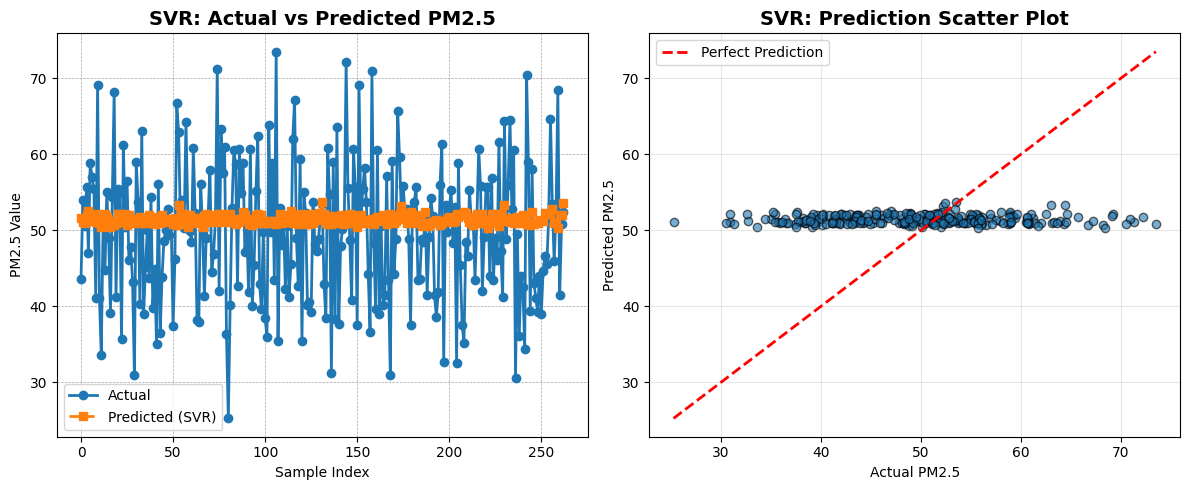

In [16]:
# Visualize SVR predictions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
y_test_array = np.array(y_test).flatten()
plt.plot(y_test_array, label='Actual', marker='o', linestyle='-', linewidth=2)
plt.plot(y_pred_svr, label='Predicted (SVR)', marker='s', linestyle='--', linewidth=2)
plt.title('SVR: Actual vs Predicted PM2.5', fontsize=14, fontweight='bold')
plt.xlabel('Sample Index')
plt.ylabel('PM2.5 Value')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Scatter plot for SVR
plt.subplot(1, 2, 2)
plt.scatter(y_test_array, y_pred_svr, alpha=0.6, edgecolors='k')
plt.plot([y_test_array.min(), y_test_array.max()], 
         [y_test_array.min(), y_test_array.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.title('SVR: Prediction Scatter Plot', fontsize=14, fontweight='bold')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

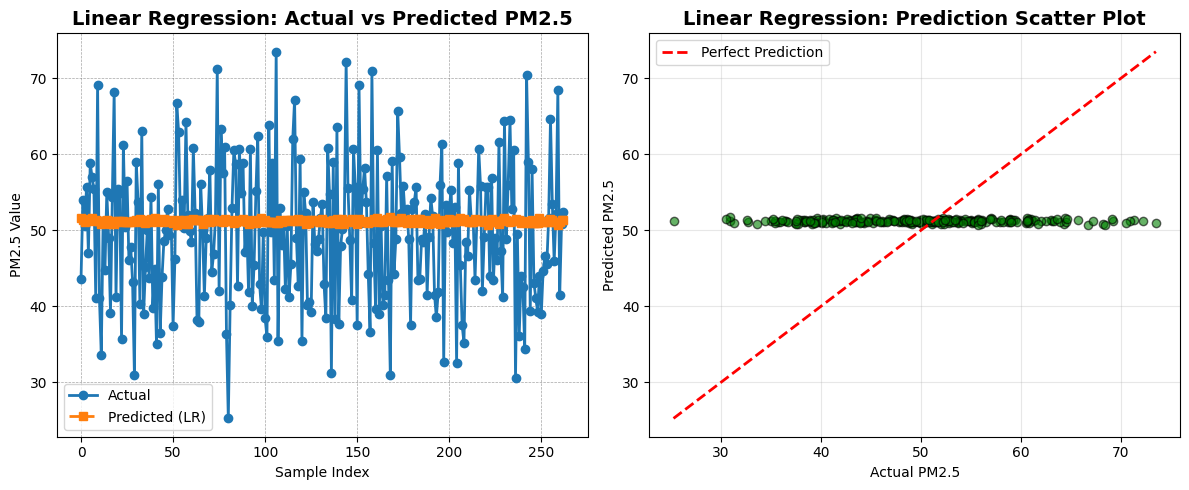

In [17]:
# Visualize Linear Regression predictions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(y_test_array, label='Actual', marker='o', linestyle='-', linewidth=2)
plt.plot(y_pred_lr, label='Predicted (LR)', marker='s', linestyle='--', linewidth=2)
plt.title('Linear Regression: Actual vs Predicted PM2.5', fontsize=14, fontweight='bold')
plt.xlabel('Sample Index')
plt.ylabel('PM2.5 Value')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Scatter plot for Linear Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test_array, y_pred_lr, alpha=0.6, edgecolors='k', color='green')
plt.plot([y_test_array.min(), y_test_array.max()], 
         [y_test_array.min(), y_test_array.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.title('Linear Regression: Prediction Scatter Plot', fontsize=14, fontweight='bold')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

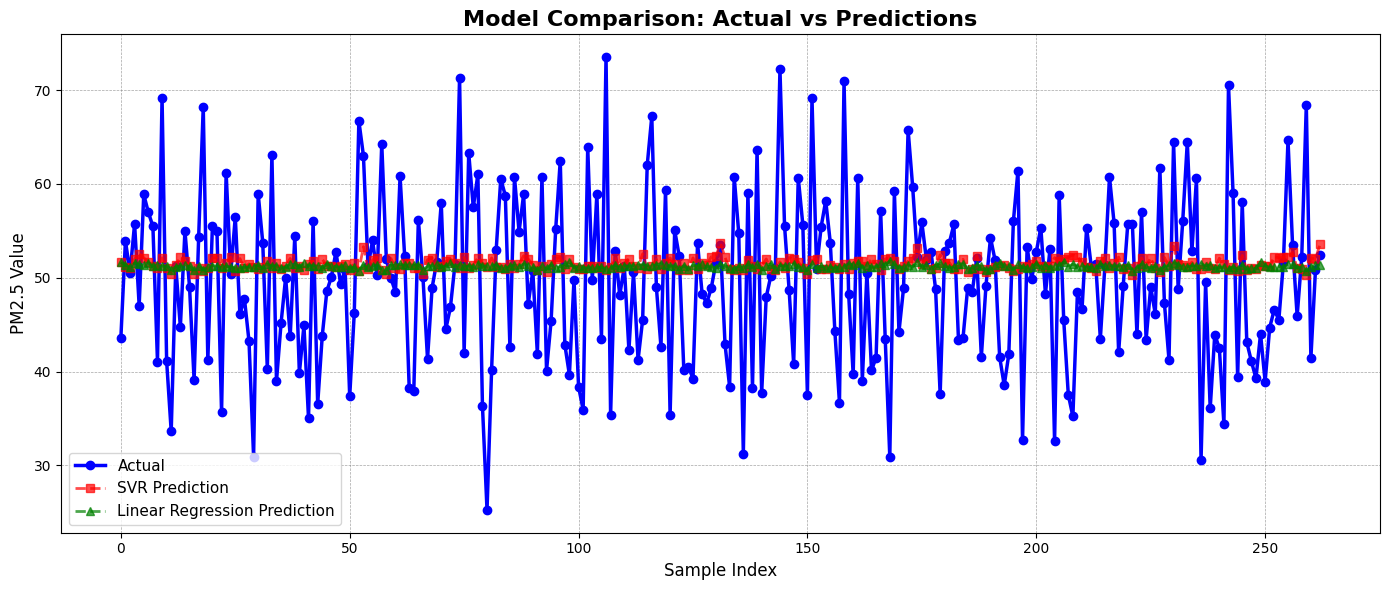

In [18]:
# Side-by-side comparison visualization
plt.figure(figsize=(14, 6))

plt.plot(y_test_array, label='Actual', marker='o', linestyle='-', linewidth=2.5, color='blue')
plt.plot(y_pred_svr, label='SVR Prediction', marker='s', linestyle='--', linewidth=2, color='red', alpha=0.7)
plt.plot(y_pred_lr, label='Linear Regression Prediction', marker='^', linestyle='--', linewidth=2, color='green', alpha=0.7)

plt.title('Model Comparison: Actual vs Predictions', fontsize=16, fontweight='bold')
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('PM2.5 Value', fontsize=12)
plt.legend(fontsize=11)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

ValueError: x and y must be the same size

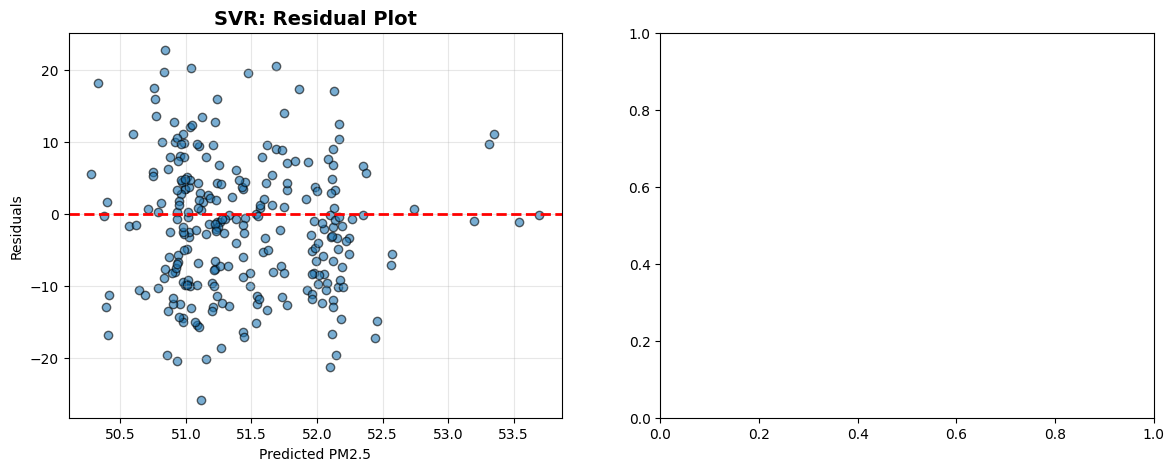

In [19]:
# Residual analysis
residuals_svr = y_test_array - y_pred_svr
residuals_lr = y_test_array - y_pred_lr

plt.figure(figsize=(14, 5))

# SVR residuals
plt.subplot(1, 2, 1)
plt.scatter(y_pred_svr, residuals_svr, alpha=0.6, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('SVR: Residual Plot', fontsize=14, fontweight='bold')
plt.xlabel('Predicted PM2.5')
plt.ylabel('Residuals')
plt.grid(True, alpha=0.3)

# Linear Regression residuals
plt.subplot(1, 2, 2)
plt.scatter(y_pred_lr, residuals_lr, alpha=0.6, edgecolors='k', color='green')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Linear Regression: Residual Plot', fontsize=14, fontweight='bold')
plt.xlabel('Predicted PM2.5')
plt.ylabel('Residuals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()